# Small Multiples

In [1]:
%matplotlib inline
import pandas as pd
from stemgraphic.grid import small_multiples

Using the Titanic dataset.

In [2]:
df = pd.read_csv('../datasets/train.csv', index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Distribution of name as stem-and-leaf (alpha bigram in this case), by Male and Female. Using shared stem so they are back to back.

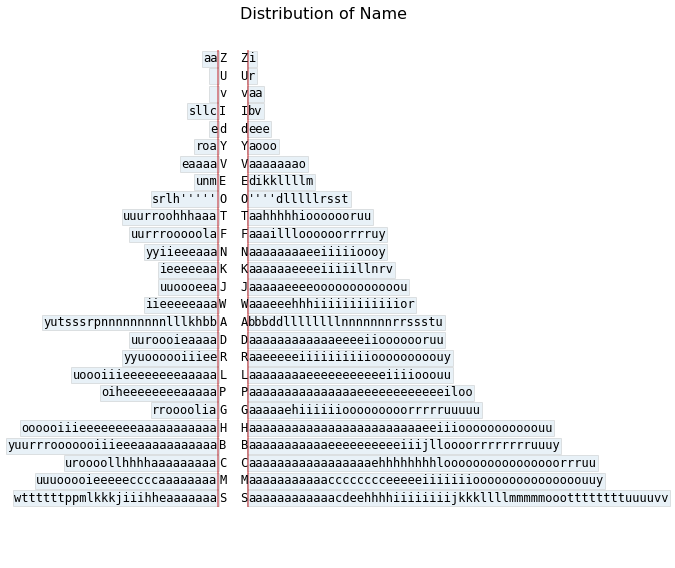

In [4]:
small_multiples(df, 'Name', legend=None, cols='Sex',
                density=False, shared_stem=True, stem_display=True, flip_axes=False,
                limit_var=False);

The same, but using a density plot. Density plot recognizes variable as categorical and generates a name_code variable, since it can't plot density on names directly.

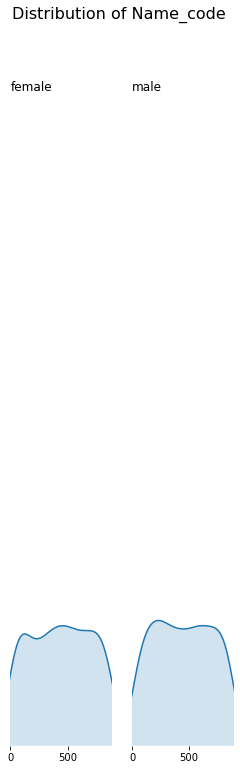

In [5]:
small_multiples(df, 'Name', legend=None, cols='Sex', density=True, flip_axes=False,
                limit_var=True);

Distribution of age, by sex, again using a shared stem, by port (C, Q, S - we'll use categorical further down)

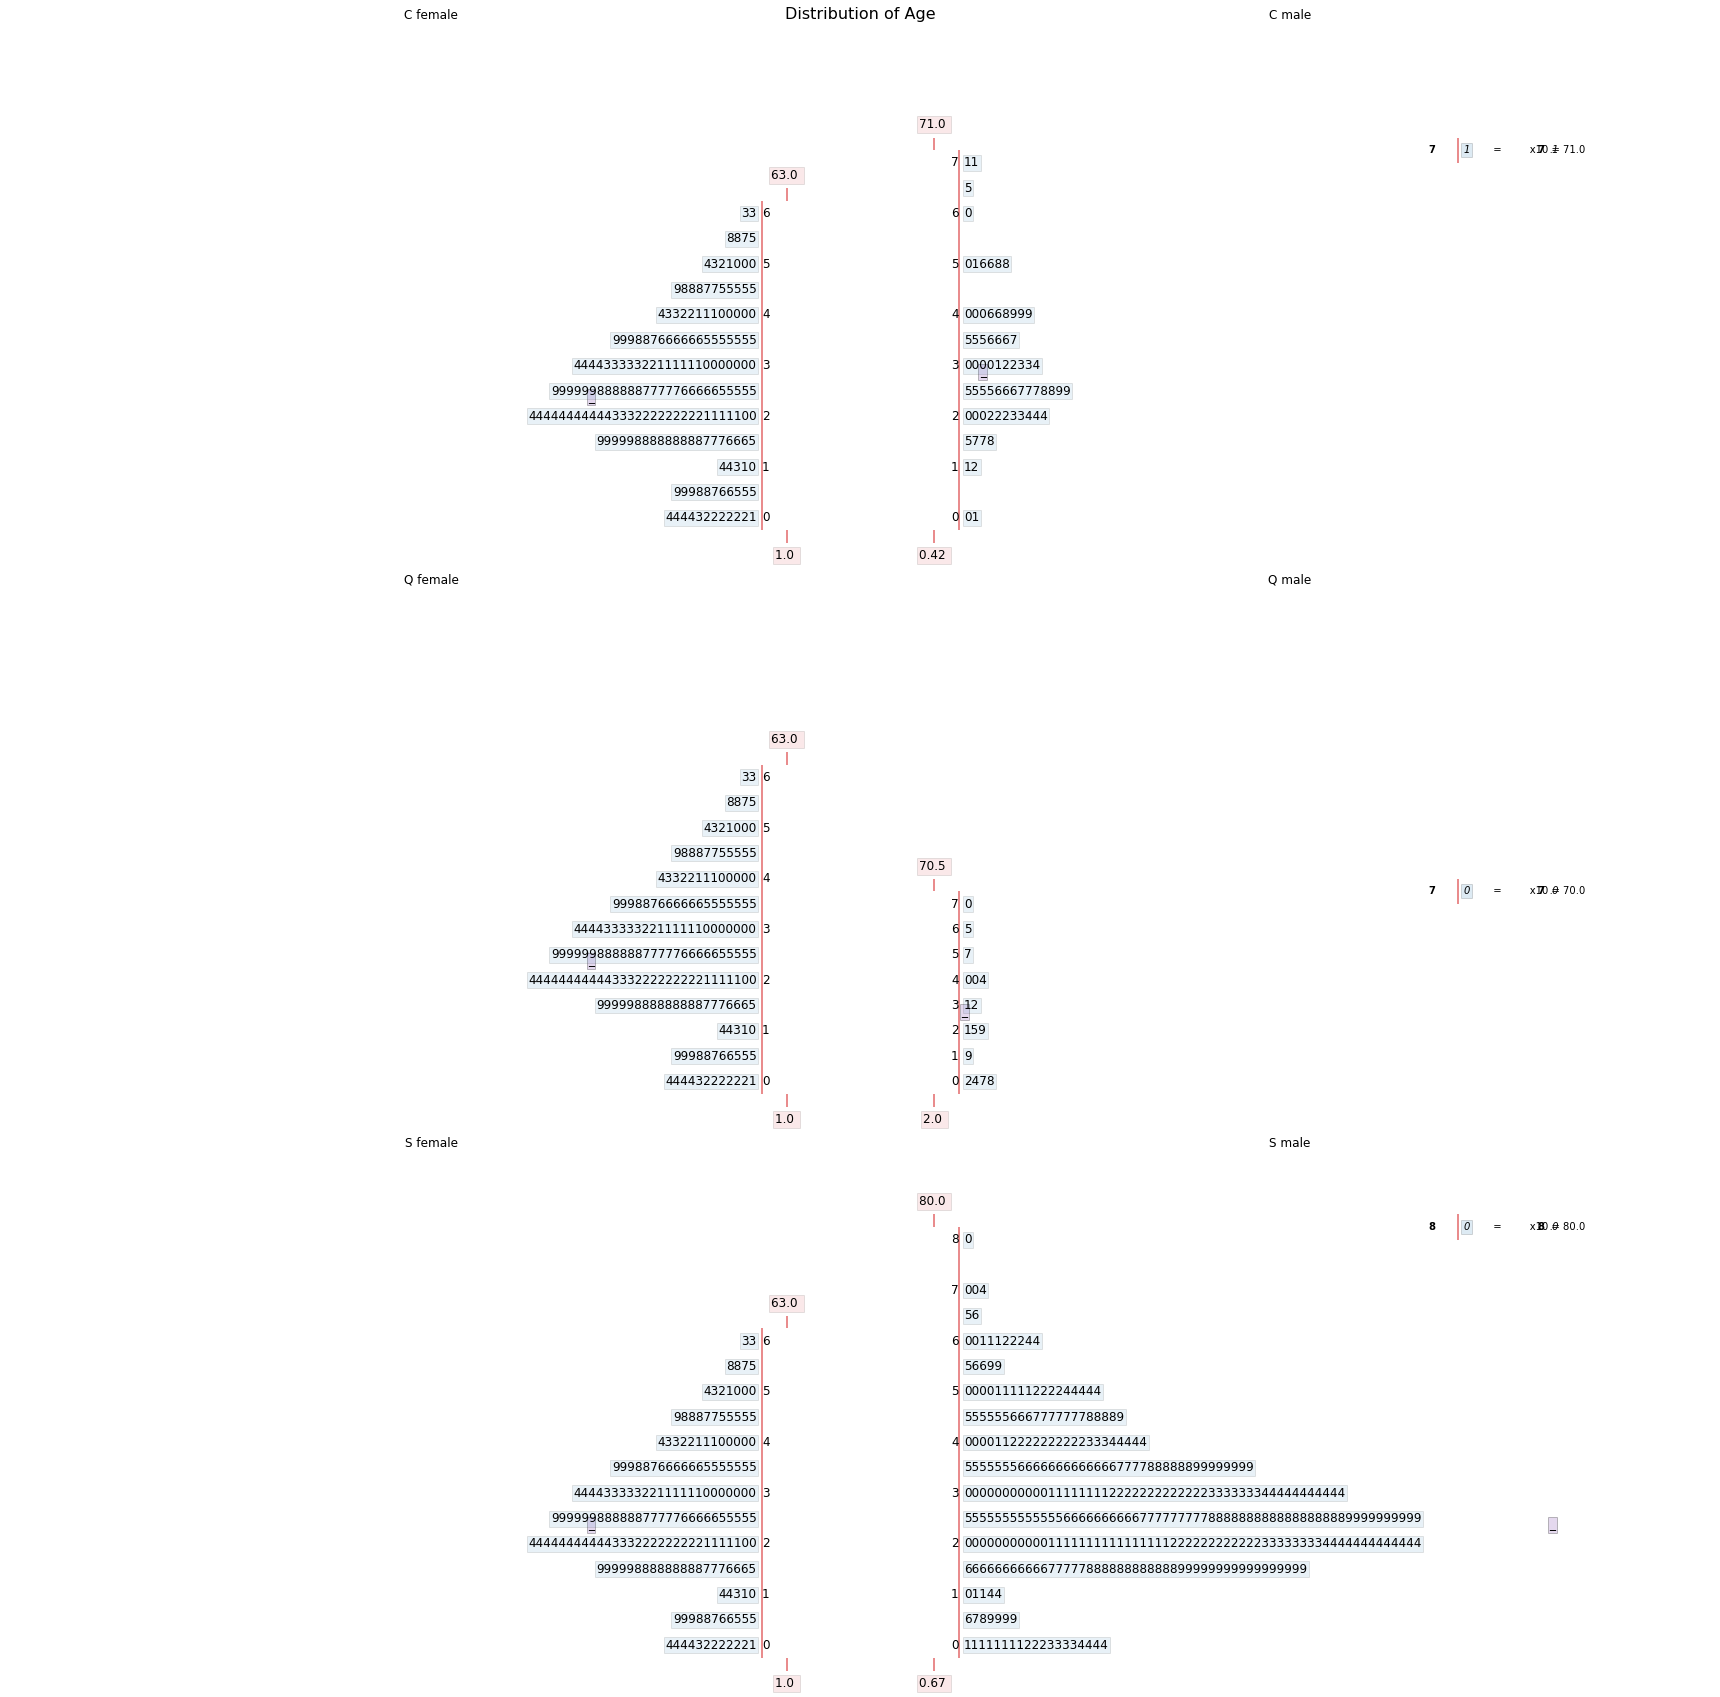

In [6]:
small_multiples(df, 'Age', legend=None, cols='Sex',  rows='Embarked', 
                density=False, shared_stem=True, stem_display=True, flip_axes=False,
                limit_var=False);

Going back to name, this time not using a shared stem. Note O' name beginnings in Queenstown (nowadays Cobh, Ireland).

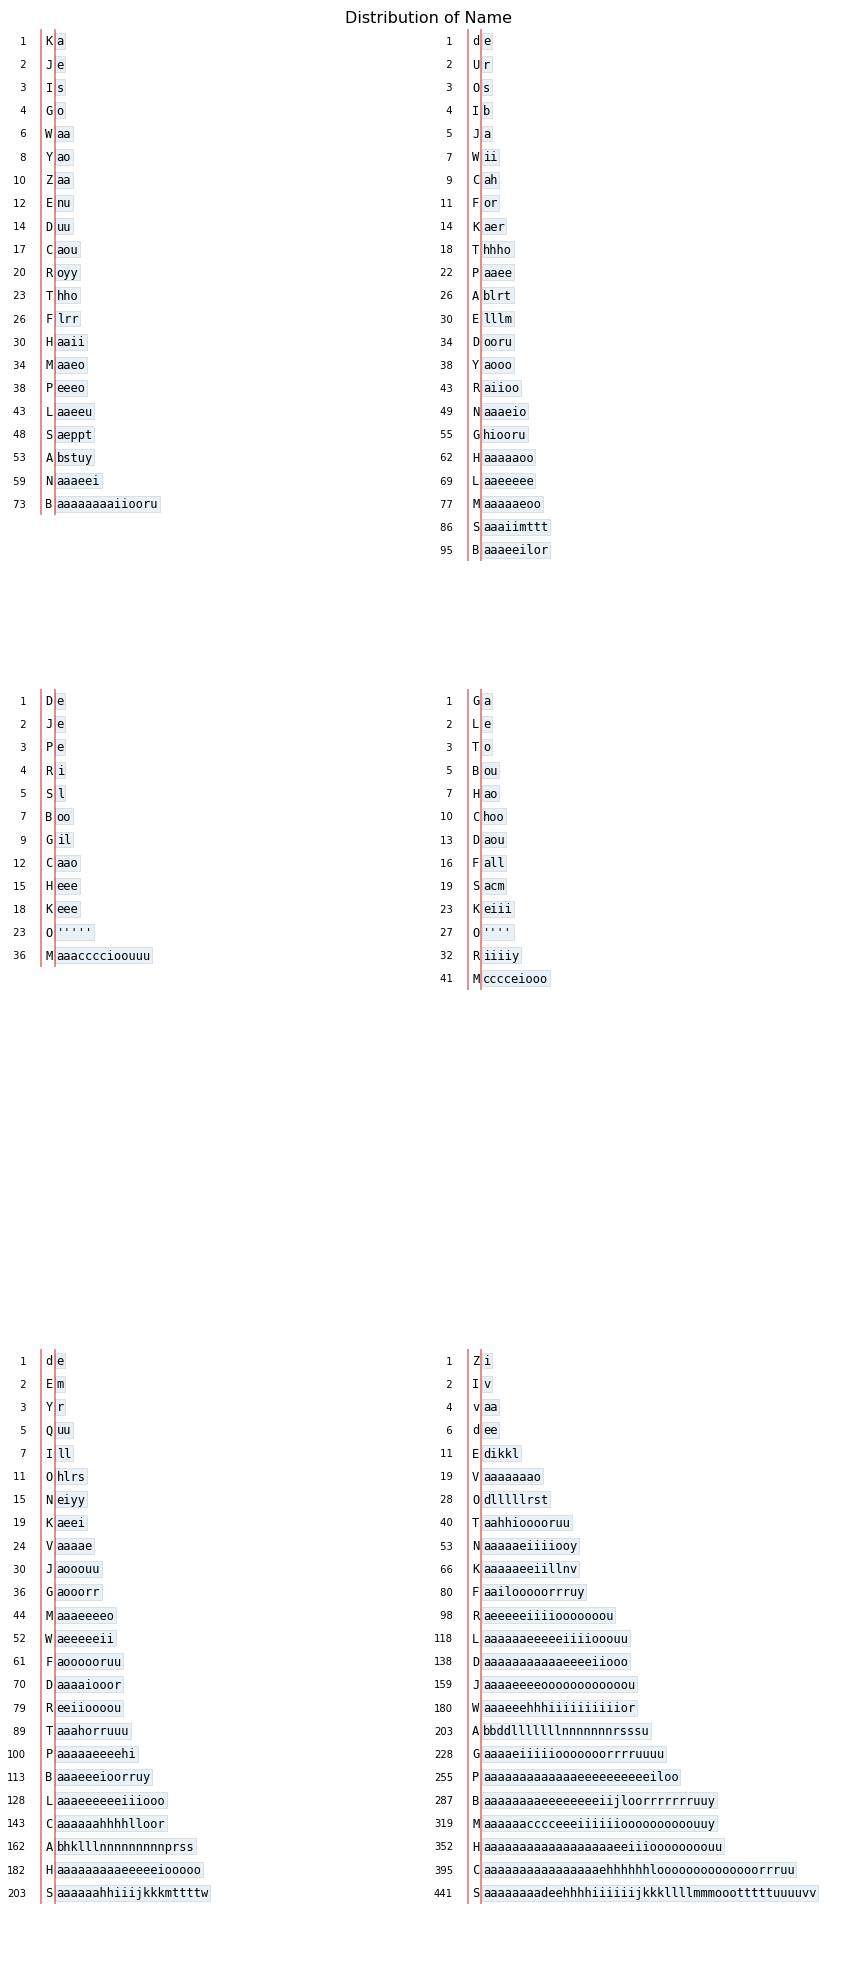

In [7]:
small_multiples(df, 'Name', legend=None, cols='Sex',  rows='Embarked', 
                density=False, stem_display=True, flip_axes=False,
                limit_var=False);

Using a layout with the legend at the top. Still not using a categorical, so passing row labels.

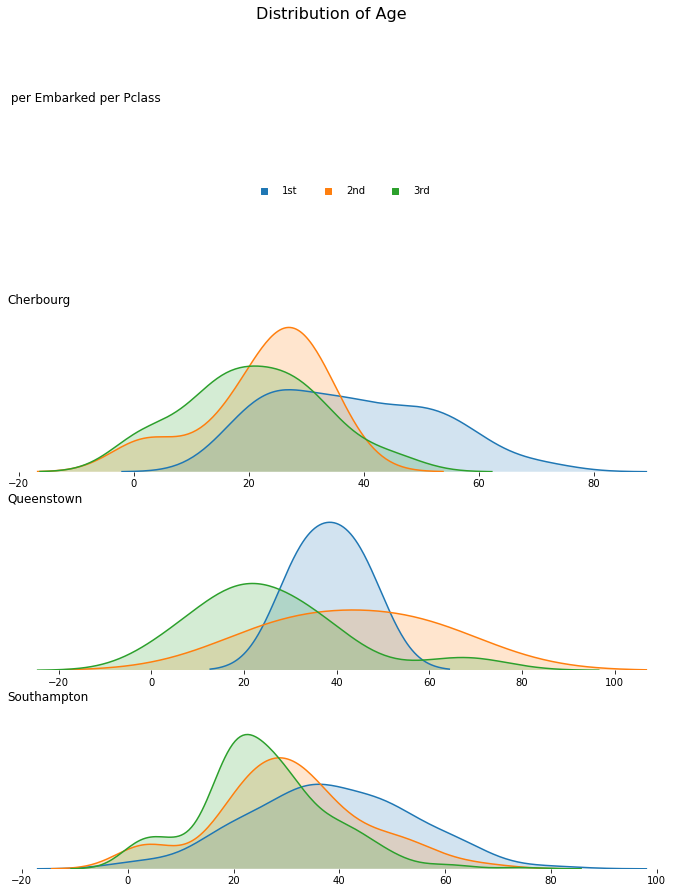

In [8]:
small_multiples(df, 'Age', legend='top', hues='Pclass', rows='Embarked', density=True,
             hue_labels=['1st', '2nd', '3rd'], row_labels=['Cherbourg', 'Queenstown', 'Southampton']);

Age can't be less than zero. Let density_plot infer from data with limit_var.

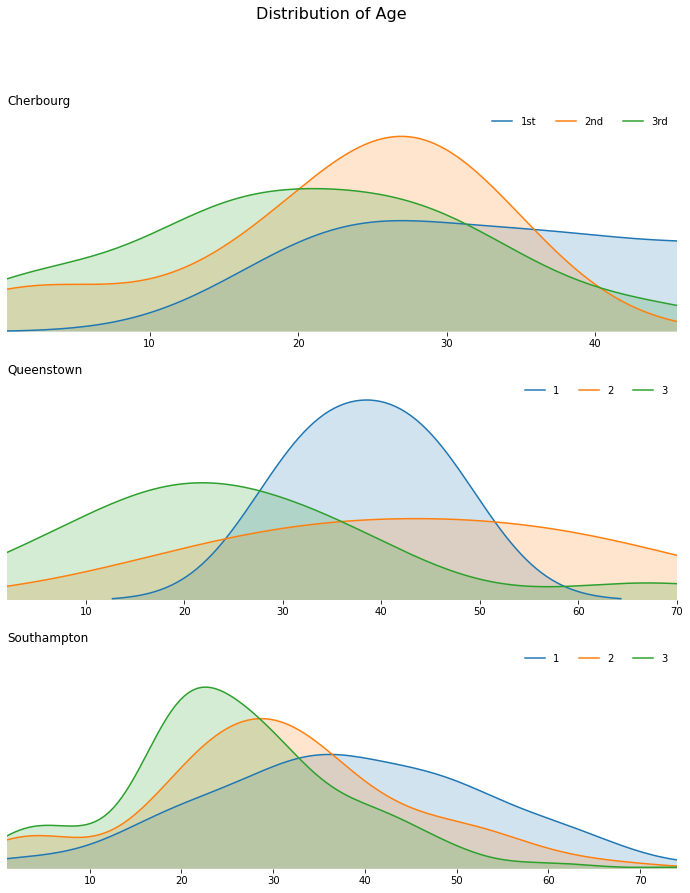

In [9]:
small_multiples(df, 'Age', hues='Pclass', limit_var=True, rows='Embarked', density=True,
             hue_labels=['1st', '2nd', '3rd'], row_labels=['Cherbourg', 'Queenstown', 'Southampton']);

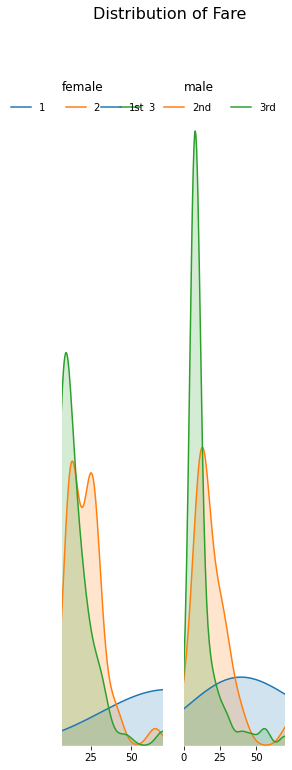

In [10]:
fig, ax, x = small_multiples(df, 'Fare', hues='Pclass', legend='on', limit_var=True, cols='Sex', density=True,
                          hue_labels=['1st', '2nd', '3rd'])

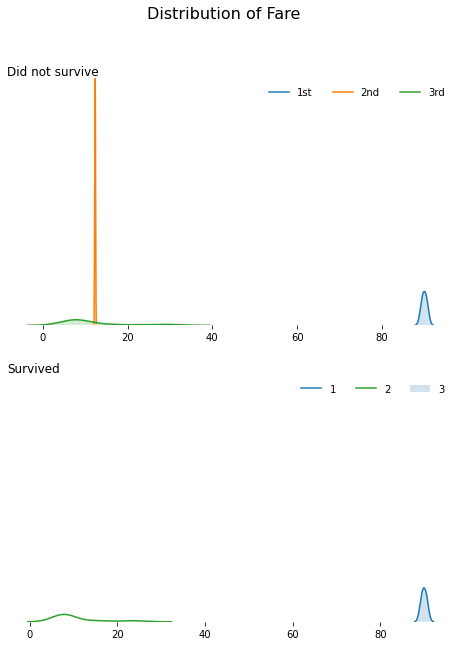

In [11]:
fig, ax, x = small_multiples(df[df.Embarked=='Q'], 'Fare', hues='Pclass', legend='on', rows='Survived', density=True,
                          hue_labels=['1st', '2nd', '3rd'], row_labels=['Did not survive', 'Survived'])

# categorical

In [12]:
df2 = df.copy()

In [13]:
df2.Survived = df2.Survived.astype('category')

In [14]:
df2.Survived.cat.set_categories(['Did not survived', 'survived'], rename=True, inplace=True)

In [15]:
df2.Pclass = df2.Pclass.astype('category')
df2.Pclass.cat.set_categories(['1st', '2nd', '3rd'], rename=True, inplace=True)

In [16]:
df2.Embarked = df2.Embarked.astype('category')
df2.Embarked.cat.set_categories(['Cherbourg', 'Queenstown', 'Southampton'], rename=True, inplace=True)

In [17]:
df2.Sex = df2.Sex.astype('category')

In [18]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_code
PassengerId,,,,,,,,,,,,
1,Did not survived,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,108
2,survived,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,190
3,survived,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,353
4,survived,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,272
5,Did not survived,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,15


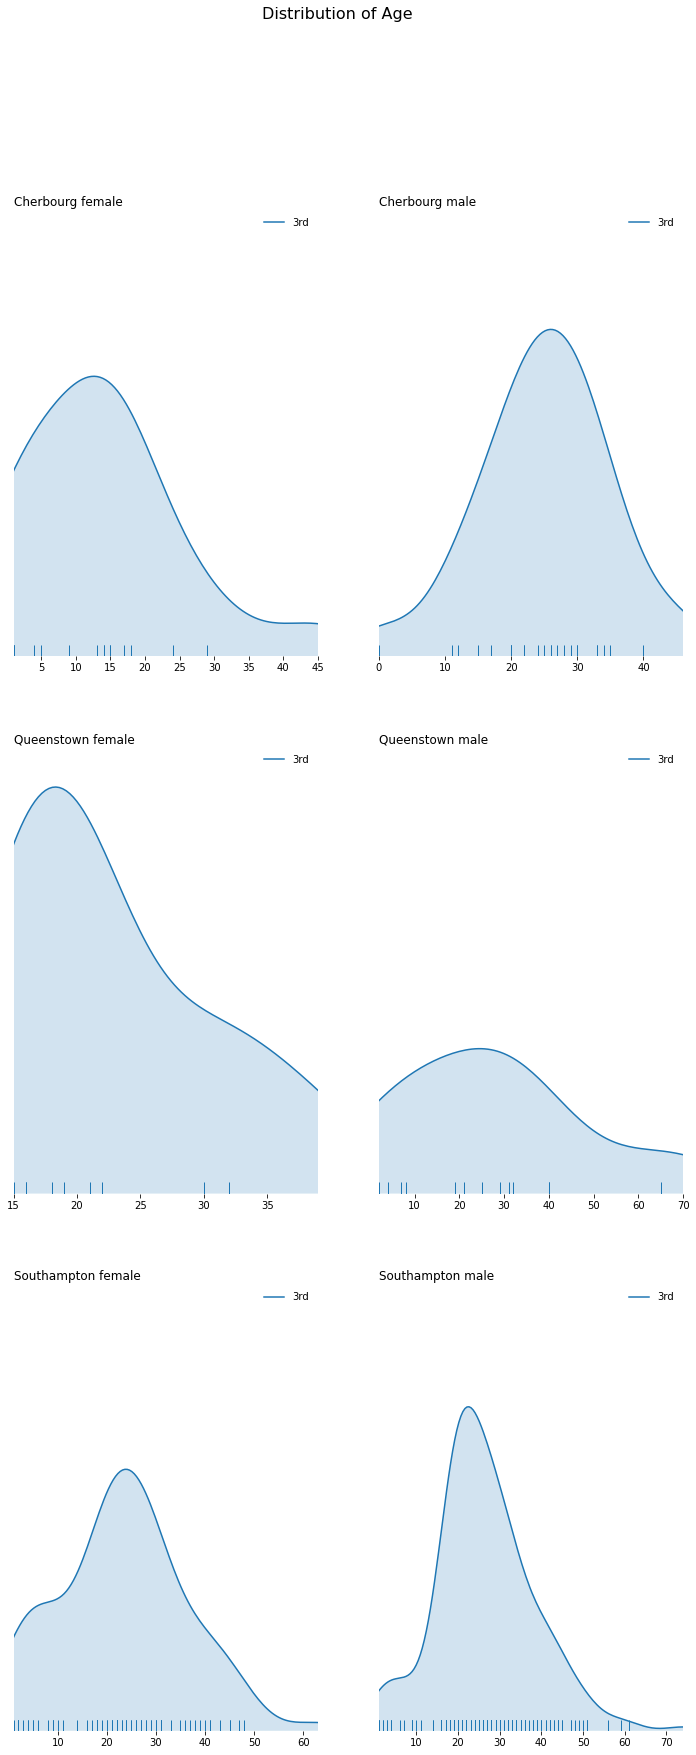

In [19]:
fig, ax, x = small_multiples(df2[df2.Pclass=='3rd'], 'Age', hues='Pclass', rows='Embarked', cols='Sex', 
                             density=True, rug=True, limit_var=True);

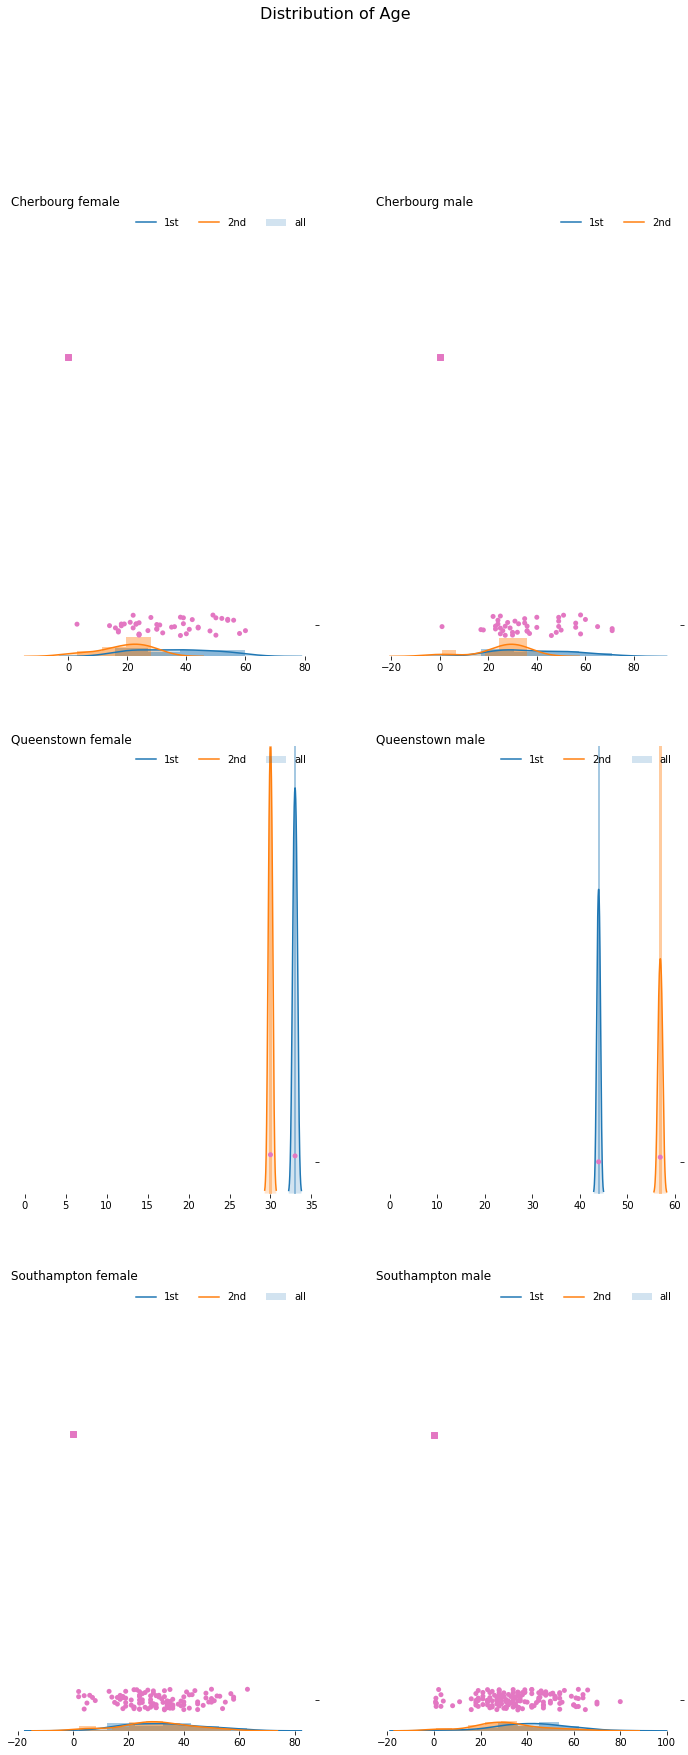

In [20]:
small_multiples(df2[df2.Pclass.isin(['1st','2nd'])], 'Age', hues='Pclass', rows='Embarked', cols='Sex',
                density=True, hist=True, strip=True, jitter=True);

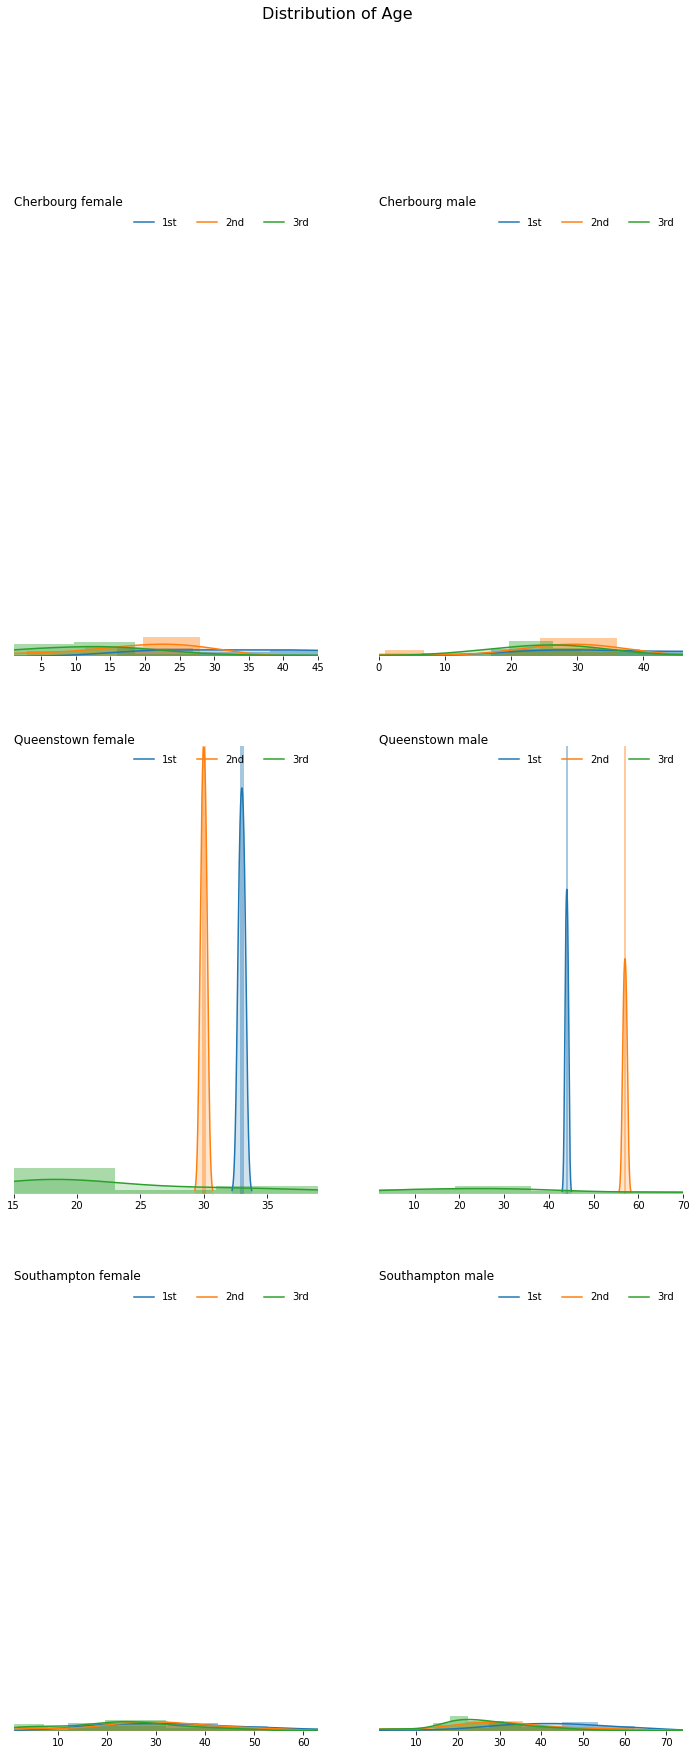

In [21]:
small_multiples(df2, 'Age', hues='Pclass', rows='Embarked', cols='Sex',
                density=True, hist=True, limit_var=True);